In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



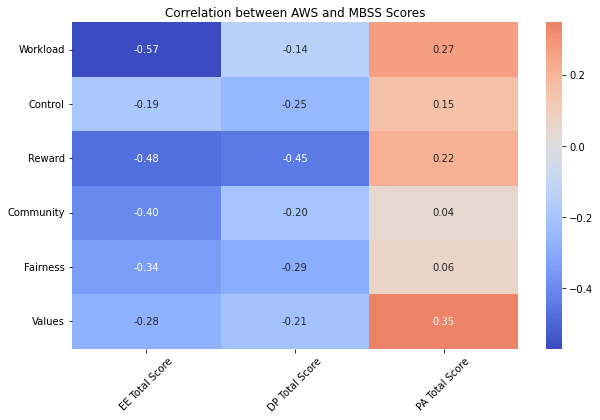

In [15]:
# Function to load the data and reshape it for merging
def load_and_reshape(file_path, column_prefix):
    data = pd.read_csv(file_path)
    # data = reshape_survey_data(data, column_prefix=column_prefix)
    return data

# Function to reshape survey data
def reshape_survey_data(df, index=['ID', 'Time Point'], column_prefix=''):
    survey_scores = df.drop(columns=index)
    survey_scores.columns = [column_prefix + str(col) for col in survey_scores.columns]
    return df[index].join(survey_scores).set_index(index)

# Load and reshape all survey data
aws_data = pd.read_csv('../Studies/aws_scores.csv')
gad_7_data = pd.read_csv('../Studies/gad-7_scores.csv')
mbss_data = pd.read_csv('../Studies/mbss_scores.csv')
phq_8_data = pd.read_csv('../Studies/phq-8_scores.csv')
phq_15_data = pd.read_csv('../Studies/phq-15_scores.csv')
psqi_data = pd.read_csv('../Studies/psqi_scores.csv')

# Select the columns of interest from the AWS data
aws_interest_columns = ['ID', 'Time Point', 'Workload', 'Control', 'Reward', 'Community', 'Fairness', 'Values']
aws_filtered = aws_data[aws_interest_columns]

# Select the columns of interest from the MBSS data
mbss_interest_columns = ['ID', 'Time Point', 'EE Total Score', 'DP Total Score', 'PA Total Score']
mbss_filtered = mbss_data[mbss_interest_columns]

# Merge the two datasets on 'ID' and 'Time Point'
merged_data = pd.merge(aws_filtered, mbss_filtered, on=['ID', 'Time Point'])

# Calculate the correlation matrix for the merged data
correlation_matrix = merged_data.corr()

# Select only the correlations between AWS and MBSS scores
aws_columns = ['Workload', 'Control', 'Reward', 'Community', 'Fairness', 'Values']
mbss_columns = ['EE Total Score', 'DP Total Score', 'PA Total Score']
correlation_matrix_cross = correlation_matrix.loc[aws_columns, mbss_columns]

# Visualize the cross-survey correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cross, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation between AWS and MBSS Scores")
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal for readability
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.show()

c:\Users\hello\anaconda3\envs\general_dl\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


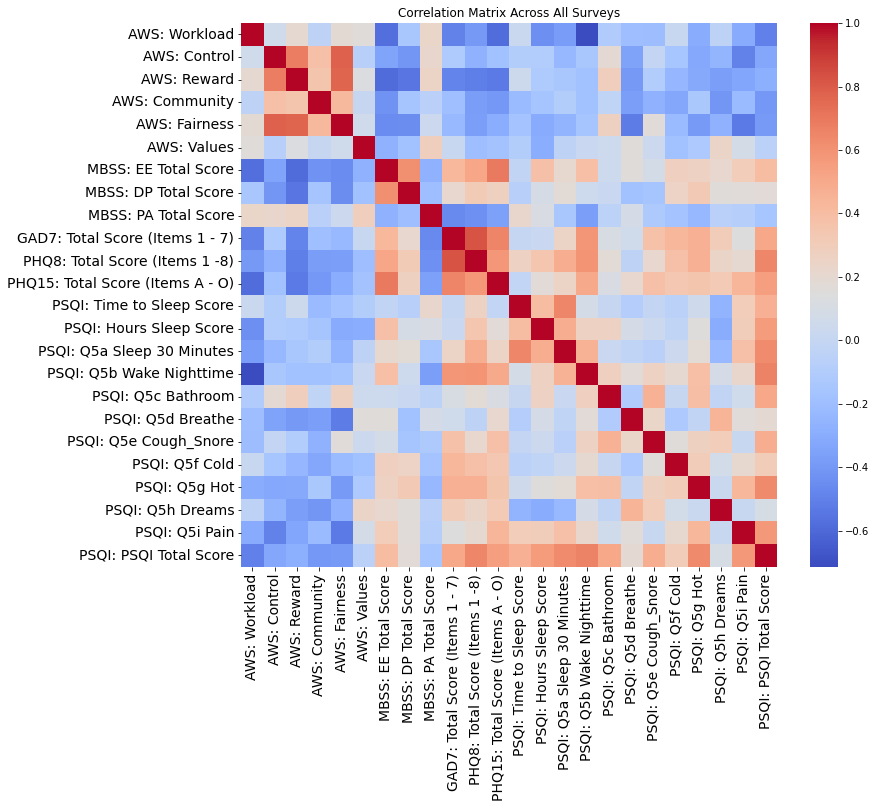

In [27]:
# Based on the identified columns, let's filter each dataset to include only the total scores and IDs
aws_scores = aws_data[['ID', 'Time Point', 'Workload', 'Control', 'Reward', 'Community', 'Fairness', 'Values']]
gad_7_scores = gad_7_data[['ID', 'Time Point', 'Total Score (Items 1 - 7)']]
mbss_scores = mbss_data[['ID', 'Time Point', 'EE Total Score', 'DP Total Score', 'PA Total Score']]
phq_8_scores = phq_8_data[['ID', 'Time Point', 'Total Score (Items 1 -8)']]
phq_15_scores = phq_15_data[['ID', 'Time Point', 'Total Score (Items A - O)']]

# Since the PSQI does not have a total score column, we will create a composite score by summing all the subscores
# This assumes that the subscores are appropriately weighted and can be summed to create a meaningful total score
# If this is not the case, the PSQI scoring protocol should be followed to create a composite score
psqi_scores = psqi_data[['ID', 'Time Point', 'Time to Sleep Score', 'Hours Sleep Score', 'Q5a Sleep 30 Minutes',
                         'Q5b Wake Nighttime', 'Q5c Bathroom', 'Q5d Breathe', 'Q5e Cough_Snore', 'Q5f Cold',
                         'Q5g Hot', 'Q5h Dreams', 'Q5i Pain']]
psqi_scores['PSQI Total Score'] = psqi_scores.iloc[:, 2:].sum(axis=1)

# Now, let's merge all datasets on 'ID' and 'Time Point'
from functools import reduce

data_frames = [aws_scores, mbss_scores, gad_7_scores, phq_8_scores, phq_15_scores, psqi_scores]
all_scores_merged = reduce(lambda left, right: pd.merge(left, right, on=['ID', 'Time Point']), data_frames)

# Calculate the correlation matrix for all the scores
all_correlation_matrix = all_scores_merged.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
ax = sns.heatmap(all_correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm')
# Create prefixes for the tick labels
prefixes = {
    'AWS': "AWS: ",
    'GAD-7': "GAD7: ",
    'MBSS': "MBSS: ",
    'PHQ-8': "PHQ8: ",
    'PHQ-15': "PHQ15: ",
    'PSQI': "PSQI: "
}

# Apply prefixes to the column names in the correlation matrix
new_columns = []
for i, col in enumerate(all_correlation_matrix.columns):
    if i in range(0, 6):
        prefix = prefixes['AWS']
    elif i in range(6, 9):
        prefix = prefixes['MBSS']
    elif i in range(9, 10):
        prefix = prefixes['GAD-7']
    elif i in range(10, 11):
        prefix = prefixes['PHQ-8']
    elif i in range(11, 12):
        prefix = prefixes['PHQ-15']
    elif i in range(12, 23):
        prefix = prefixes['PSQI']
        
    new_columns.append(prefix + col)
ax.set_xticklabels(new_columns, rotation=90, ha='center')
ax.set_yticklabels(new_columns, rotation=0)

plt.title("Correlation Matrix Across All Surveys")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [14]:
gad_7_data

,"ID,Time Point,Q1 Nervous,Q2 Control Worry,Q3 Worry Things,Q4 Trouble Relax,Q5 Restless,Q6 Annoyed,Q7 Afraid,Total Score (Items 1 - 7)"
0,"BIN01,Baseline,2,1,1,2,0,2,2,10"
1,"BIN01,Follow Up,2,1,2,1,1,2,2,11"
2,"BIN02,Baseline,1,1,1,1,1,2,2,9"
3,"BIN02,Follow Up,2,2,2,2,2,2,2,14"
4,"BIN03,Baseline,0,0,0,0,0,0,0,0"
...,...
64,"BIN33,,,,,,,,,0"
65,"BIN34,Baseline,0,0,1,1,0,1,0,3"
66,"BIN34,,,,,,,,,0"
67,"BIN35,Baseline,1,0,1,1,0,1,1,5"
